### Clustering

Jay Urbain, PhD


1 - Review clustering and K-Means

2 - Review clusting with scikit-learn and the iris dataset.

3 - K-Prototype clustering the adult dataset.

### Clustering###

You are given a data set where each observed example has a set of features, but has no labels. Labels are an essential for a supervised learning algorithm like *Logistic Regressin*, which learns a hypothesis function to predict labels given features. So what can we do to better understand the data?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

*K-Means* is one of the most popular "clustering" algorithms. K-means stores *k* centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between:

1) assigning data points to clusters based on the current centroids

2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="kmeansViz.png">

*Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan.*

### Clustering with scikit-learn

[http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#)

In [2]:
from sklearn import cluster, datasets
# plots within notebook versus launching a separate window
%matplotlib inline 

iris = datasets.load_iris()
X_iris = iris.data
print(X_iris[1:10,])
print (type(X_iris))
print (X_iris.shape)

y_iris = iris.target
print(type(y_iris))
print(y_iris.shape)
#print type(y_iris)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
print('k_means labels:', k_means.labels_[1:10,])
print('y_iris data:', y_iris[1:10,])

[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)
k_means labels: [2 2 2 2 2 2 2 2 2]
y_iris data: [0 0 0 0 0 0 0 0 0]


The plots below display what a *K-means* algorithm would yield using three clusters. It is then shown what the effect of a bad initialization is on the classification process: By setting n_init to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. The next plot displays what using eight clusters would deliver and finally the ground truth.

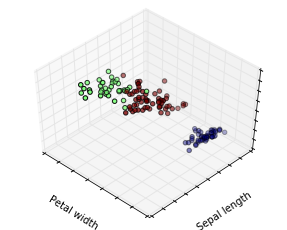

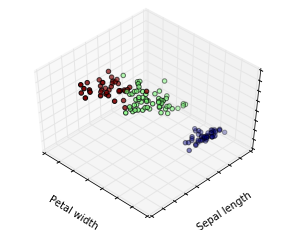

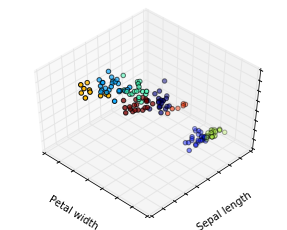

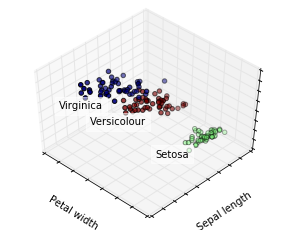

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Clustering the Adult Dataset

The adult dataset is an example of a complex real world data set. In this dataset, the aim is to estimate if someone earns more than $50,000 per year. The dataset attributes describe a person, their environment, their background, and their life status.

*Attribute Information*

- \>50K, <=50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, - Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-- spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### 1) Download and examine the adult data set

To download the dataset, navigate to [http://archive.ics.uci.edu/ml/datasets/Adult](http://archive.ics.uci.edu/ml/datasets/Adult), click on the *Data Folder* link, 
and download the *adult.data* and *adult.names* files into a data subdirectory to your IPython notebook. You can also read a description of the dataset.

In [4]:
# Download

import os
import pandas as pd
#data_folder = os.path.jin(os.path.exanduser("-"), "Data", "Adult")
#adult_filename 
adult_filename= "data/adult.data"

adult = pd.read_csv(adult_filename, header=None,
names=["Age", "Work-Class","fnlwgt", 
"Education", "Education-Num",
"Martial-Status", "Occupation",
"Relationship", "Race", "Sex",
"Capital-gain", "Captial-loss",
"Hours-per-week", "Natie-Country",
"Earnings-Raw"])

In [5]:
# Examine the data 
# Note: there are many attributes, so you may need to scroll right

adult.head(n=20)

,Age,Work-Class,fnlwgt,Education,Education-Num,Martial-Status,Occupation,Relationship,Race,Sex,Capital-gain,Captial-loss,Hours-per-week,Natie-Country,Earnings-Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Data files can contain extra blank lines at the end of the file. By default, *pandas* will interpret the penultimate new line to be an empty (but valid) row. To remove this, remvove any row with invalid numbers. The *inplace* parameter just makes the change in the give Dataframe, rather than create a new Dataframe.

In [6]:
print(adult.shape)
adult.dropna(how='all', inplace=True)
print(adult.shape)

(32561, 15)
(32561, 15)


** Examining the attributes**

Pandas dataframes provide useful functions for describing a dataset. 

You can access each column as shown below. There are several functions you can run on each column to better understand the type and distribution of each attribute. Some functions may not make sense, e.g., mean of Marital-Status.

[http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html](http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html)

Add additional notebook cells below to examine each column in the dataset. I

In [7]:
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Martial-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Captial-loss', 'Hours-per-week', 'Natie-Country',
       'Earnings-Raw'],
      dtype='object')

In [8]:
adult["Age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [9]:
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [10]:
adult["Hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [11]:
adult["fnlwgt"].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

### 2) Feature selection and normalization

Select at least 6 distinct attributes in addition to income for clustering. By distinct, I’m refereeing to non-redundant, i.e., non-correlated, feature attributes. For example, don’t select both forms of education. 

Select features you think may be indicative of higher income and select features of multile types, e.g., continuous, discrete, ordinal, and categorical. You may select more, and you may want to change your feature selection as you experiment.

You also may want to not include columns with many missing values.

Enter your selections in the cell below.

In [12]:
# age, education-num, occupation, hours-per-week, sex, race

** Feature normalization**

For each of your selected features, identify a strategy to normalize your data between 0 and 1.

- Numerical attributes, e.g., income, are normalized to values between 0 and 1 using min-max normalization. 
- Ordinal attributes, i.e., education, are normalized to a range of 0 to 1. 
- Boolean attributes are set to either 0 or 1.
- Categorical attributes are assigned an integer enumerated type, e.g., 1, 2, 3, ... and return 1 if there is a match, 0 otherwise.

Define your strategy and provide prototype script for normalizing each of your features in the cells below.

In [13]:
# Age - normalize to values between 0 and 1 using min-max normalization
def normalizeNumerical(df):
    min_v = df.min()
    max_v = df.max()
    return df.apply(lambda x: (x - min_v) / (max_v - min_v))
norm_funcs = {'Age': normalizeNumerical}

In [14]:
# Education-num - normalize to values between 0 and 1 using min-max normalization
norm_funcs['Education-Num'] = normalizeNumerical

In [15]:
# Occupation - assign an integer enumerated type
def normalizeCategorical(df):
    c_list = list(set(df.values))
    c_dict = {c: c_list.index(c) + 1 for c in c_list}
    return df.apply(lambda x: c_dict[x])
norm_funcs['Occupation'] = normalizeCategorical
categ_features = ['Occupation']

In [16]:
# Hours-per-week - normalize to values between 0 and 1 using min-max normalization
norm_funcs['Hours-per-week'] = normalizeNumerical

In [17]:
# Sex - Boolean with values 0 -> Male, 1 -> Female
def normalizeSex(df):
    return df.apply(lambda x: 0 if 'Male' in x else 1)
norm_funcs['Sex'] = normalizeSex
categ_features.append('Sex')

In [18]:
# Race - assign an integer enumerated type
norm_funcs['Race'] = normalizeCategorical
categ_features.append('Race')

In [19]:
def normalizeEarnings(df):
    return df.apply(lambda x: 0 if '<=' in x else 1)
norm_funcs['Earnings-Raw'] = normalizeEarnings
categ_features.append('Earnings-Raw')

** Missing values **

Examine the dataset, and your selected features for missing values. You will need to come up with a strategy for dealing with missing values for each of your selected attributes. 

Strategies:

- Replace mssing values with the most likely value, e.g., mode for categorical or boolean, mean for continuous, etc. This can be risky, since you distort the relationships in the data.
- Encode missing values that will work within a *distance* function. Sometimes, the fact that the feature *is* missing has meaning.
- Just delete the row containing the missing value. As long as you do not throw away too much data, this can be the best strategy.

Define your missing value strategy in the cell below.

In [20]:
# Delete rows containing missing values

### 3) Creating a cluster dataset

Using your selected attributes and the income attribute, create a new *clustering* dataframe where each attriubte is normalized and where you've dealth with missing values.

In [21]:
features = ['Age', 'Education-Num', 'Occupation', 'Hours-per-week', 'Sex', 'Race', 'Earnings-Raw']
clustering = adult.dropna(how='any', subset=features)
for feature in features:
    clustering[feature] = norm_funcs[feature](clustering[feature])
clustering = clustering[features]

** Validate your clustering dataframe**

This may be the most important step. Examine the records in your database, and run the appropriate statistical methods on each of your selected attribute columns to make sure everything is sane.

In [22]:
clustering.describe()

,Age,Education-Num,Occupation,Hours-per-week,Sex,Race,Earnings-Raw
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,9.029545,0.402423,0.330795,2.288842,0.240810
std,0.186855,0.171515,4.595150,0.125994,0.470506,0.778087,0.427581
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.150685,0.533333,5.000000,0.397959,0.000000,2.000000,0.000000
50%,0.273973,0.600000,10.000000,0.397959,0.000000,2.000000,0.000000
75%,0.424658,0.733333,13.000000,0.448980,1.000000,2.000000,0.000000
max,1.000000,1.000000,15.000000,1.000000,1.000000,5.000000,1.000000


### 4) Distance function

In the cell below, write a distance function, $d(v_1, v_2)$, that takes two vectors, i.e., rows, from your clustering dataframe. The function should return a value between 0 and 1. I.e., 0 for measuring the distance between identical instances, and 1 if there is no match beteween any attributes.

In [23]:
def distance(r1, r2):
    d_list = []
    for feature in features:
        if feature in categ_features:
            # Return 0 if matching category, else 1
            d_list.append(0 if r1[feature] == r2[feature] else 1)
        else:
            # Calculate distance for numerical columns
            d_list.append(abs(r1[feature] - r2[feature]))
    return np.mean(d_list)

### 5) K-Prototype Clustering

Implement *K-Prototype* clustering. K-Prototype is an extension of K-Means to accommodate non-numerical, i.e., Boolean and categorica, attributes, which you can do with *K-means* and your most excellent distance function!

Provide your clustering function in the cell below.

In [57]:
from random import randrange

def calculate_centroid(rows):
    attrs = {}
    for row in rows:
        for attr in row:
            print('---')
            print(row)
            if attr not in attrs:
                attrs[attr] = []
            attrs[attr].append(row[attr])
    print(attrs)
    row = []
    for attr, values in attrs.items():
        row.append((attr, np.mean(values)))
    centroid = pd.DataFrame([[d[1] for d in row]], columns=[d[0] for d in row])
    print(centroid)

def k_prototype(df, num_clusters, iterations):
    gen_empty_features = lambda: {feature: [] for feature in features}
    partitions = [{
            'centroid': None,
            'features': gen_empty_features()
    } for i in range(num_clusters)]
    # Put each row into a random cluster
    for row in df.iterrows():
        cluster_index = randrange(0, num_clusters)
        for feature, val in row[1].iteritems():
            partitions[cluster_index]['features'][feature].append(val)
            
    for i in range(iterations + 1):
        # Calculate centroid
        for p in partitions:
            p['centriod'] = calculate_centroid(p['features'])
            p['features'] = gen_empty_features()
    
        # Move members to closest partition
            
k_prototype(clustering.head(5), 2, 1)

---
Hours-per-week


TypeError: string indices must be integers

### 6) Clustering evaluation

Evaluate your clustering algorithm by running several trials, with and without the income attribute as follows (in each case feel free to experiment):

- K - # clusters: 2, 3, 4, etc.
- t - # iterations:  5, 10, 50, ...

For each trial, its best to use multiple random restarts.

For each trial, measure:

- the intra-cluster RMSE (root mean squared error) for each cluster
- the total intra-cluster RMSE as the sum of the RMSE for all clusters, and
- the mean inter-cluster distance

RMSE as the sum of RMSEs between each distinct pair of cluster centroids.

$RMSE = \sqrt{\dfrac{\sum_{p \in C_i}( d(p, c_i))^2}{|C|}}$

Total $RMSE = \sum_{i=1}^{k} \dfrac{RSME_k}{|K|}$

Mean cluster distance $MCD = \dfrac{\sum_{i}^{K}\sum_{j, i\neq j}^{K}( d(c_i, c_i))^2}{{K}\choose{2}}$

We will consider the trial with the lowest total RMSE as the *best* result.

### 7) Tabulate and analyze your results.
What parameters (t and k) yielded the best clusters with respect to intra and inter centroid measurements?

What was the best parameterization for your clustering algorithm for isolating data objects based on the income attribute? 

What attributes are the most effective for generating clusters for income (without using the income attribute!)?